***PROJETO DE MACHINE LEARNING - CLASSIFICAÇÃO***

## 1 Conjunto de dados



Esse conjunto de dados é um benchmark amplamente utilizado para estudos relacionados ao diagnóstico de câncer de mama. Ele contém 569 amostras de tecidos mamários extraídas de exames histopatológicos. Cada amostra é representada por 30 características derivadas de imagens microscópicas, que descrevem propriedades geométricas e texturais das células, como tamanho, forma, textura e complexidade.

As amostras estão associadas a um diagnóstico categórico (benigno ou maligno) e incluem três categorias de valores para cada característica: média, erro padrão e valor máximo (worst). O objetivo principal é desenvolver modelos de machine learning para classificar o diagnóstico com base nesses atributos, auxiliando na detecção precoce de câncer de mama.


# 2 Leitura e análise dos dados

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:

pd.set_option('display.max_columns', None)
dados = pd.read_csv('/content/drive/MyDrive/Ciência de dados /PESQUISA PIBIC/Conjunto de dados/classificação/breast-cancer.csv')
dados.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [ ]:
#Embaralhar os dados
from sklearn.utils import shuffle
df = shuffle(dados, random_state=42)
df =  df.reset_index(drop=True)
df.head(15)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,87930,B,12.47,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.03821,...,14.97,24.64,96.05,677.9,0.14260,0.23780,0.2671,0.10150,0.3014,0.08750
1,859575,M,18.94,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.07951,...,24.86,26.58,165.90,1866.0,0.11930,0.23360,0.2687,0.17890,0.2551,0.06589
2,8670,M,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,...,19.26,26.00,124.90,1156.0,0.15460,0.23940,0.3791,0.15140,0.2837,0.08019
3,907915,B,12.40,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,...,12.88,22.91,89.61,515.8,0.14500,0.26290,0.2403,0.07370,0.2556,0.09359
4,921385,B,11.54,14.44,74.65,402.9,0.09984,0.11200,0.06737,0.02594,...,12.26,19.68,78.78,457.8,0.13450,0.21180,0.1797,0.06918,0.2329,0.08134
5,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.74,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400
6,9012000,M,22.01,21.90,147.20,1482.0,0.10630,0.19540,0.24480,0.15010,...,27.66,25.80,195.00,2227.0,0.12940,0.38850,0.4756,0.24320,0.2741,0.08574
7,853201,M,17.57,15.05,115.00,955.1,0.09847,0.11570,0.09875,0.07953,...,20.01,19.52,134.90,1227.0,0.12550,0.28120,0.2489,0.14560,0.2756,0.07919
8,8611161,B,13.34,15.86,86.49,520.0,0.10780,0.15350,0.11690,0.06987,...,15.53,23.19,96.66,614.9,0.15360,0.47910,0.4858,0.17080,0.3527,0.10160
9,911673,B,13.90,16.62,88.97,599.4,0.06828,0.05319,0.02224,0.01339,...,15.14,21.80,101.20,718.9,0.09384,0.20060,0.1384,0.06222,0.2679,0.07698


In [ ]:

df.shape

(569, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:

print(df.isnull().mean()*100)

id                         0.0
diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
dtype: f

# 3 Preparação do dados:

In [ ]:

df.duplicated().sum()


0

<ipython-input-21-0fac344e54cf>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>,
        <Axes: title={'center': 'radius_se'}>],
       [<Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>,
        <Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>],
       [<Axes: title={'center': 'concave points_se'}>,
        <Axes: title={'center': 's

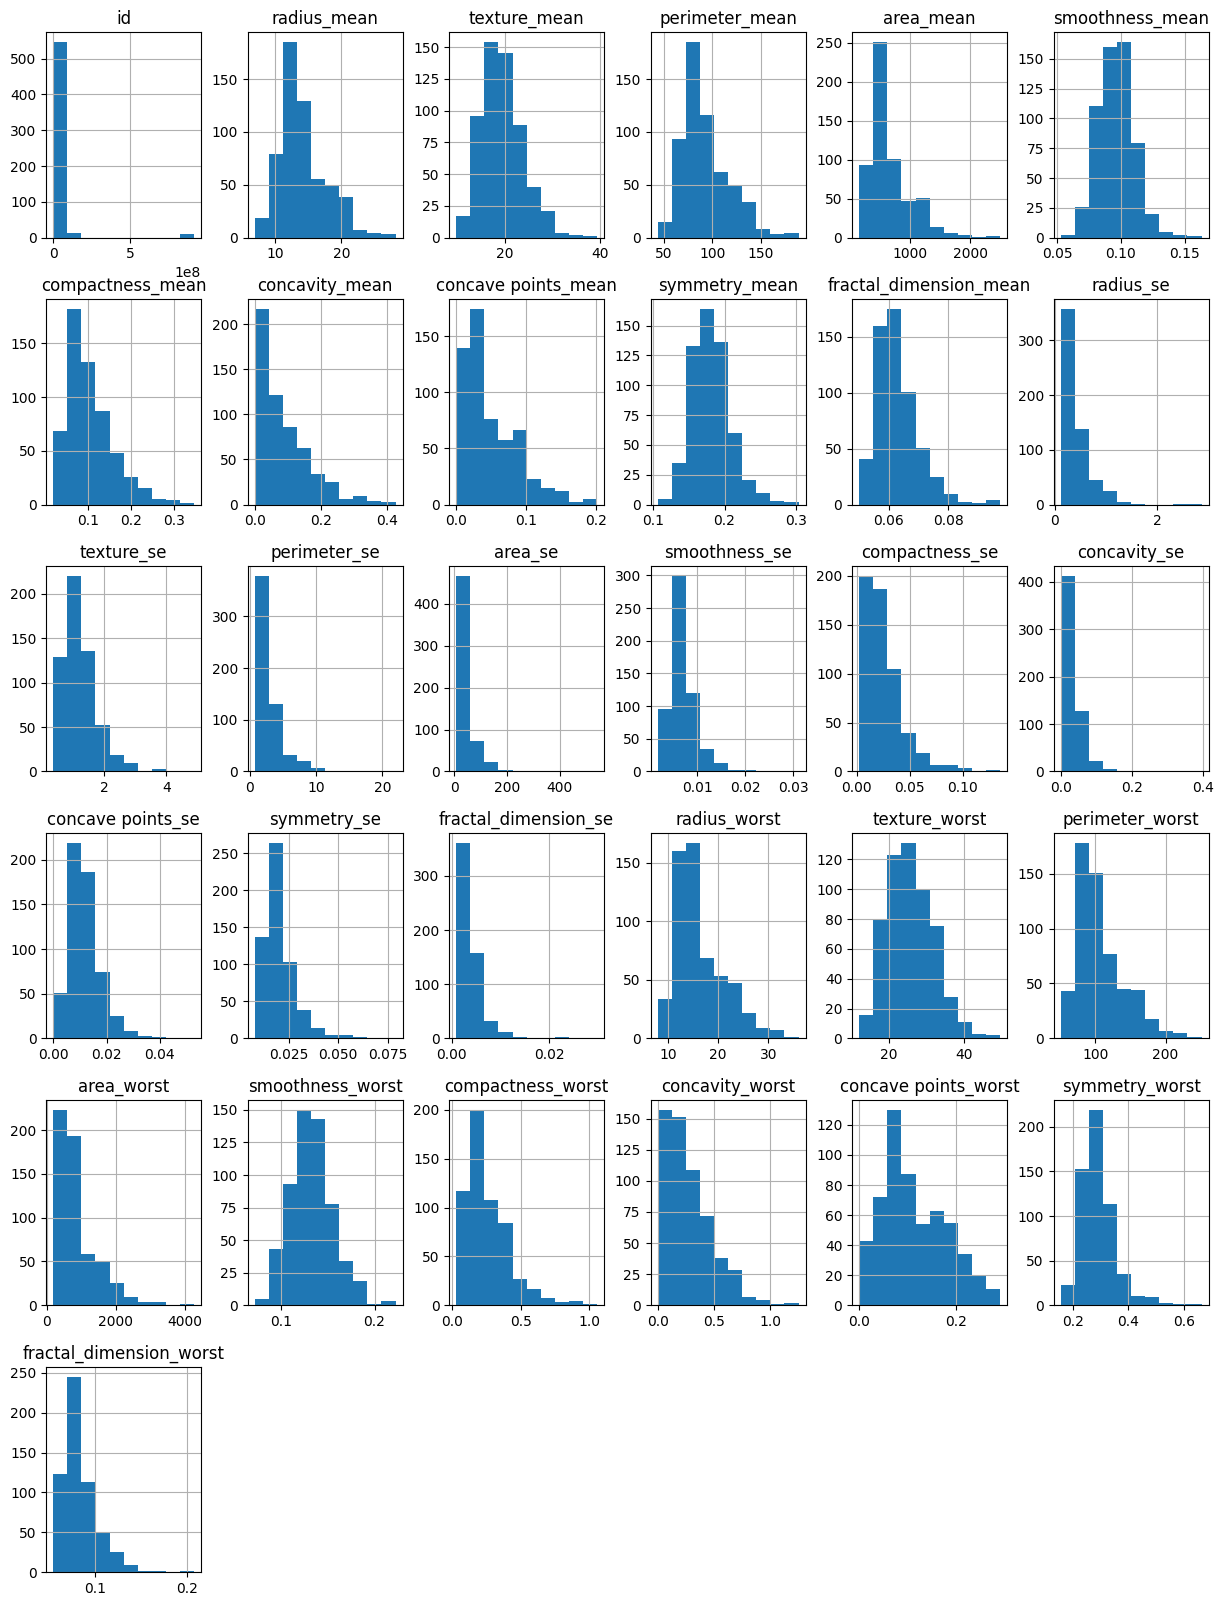

In [ ]:

fig = plt.figure(figsize = (15, 20))
ax = fig.gca()
df.hist(ax=ax)

In [ ]:
#Irei realizar a modificação M=1 e B=0
df['Diagnostico'] = df['diagnosis'].map({'M':1, 'B':0})
df.insert(2, 'Diagnostico', df.pop('Diagnostico'))
df.head()

,id,diagnosis,Diagnostico,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,87930,B,0,12.47,18.60,81.09,481.9,0.09965,0.1058,0.08005,...,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750
1,859575,M,1,18.94,21.31,123.60,1130.0,0.09009,0.1029,0.10800,...,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589
2,8670,M,1,15.46,19.48,101.70,748.9,0.10920,0.1223,0.14660,...,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019
3,907915,B,0,12.40,17.68,81.47,467.8,0.10540,0.1316,0.07741,...,12.88,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359
4,921385,B,0,11.54,14.44,74.65,402.9,0.09984,0.1120,0.06737,...,12.26,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134


In [ ]:
df.dtypes

NameError: name 'df' is not defined

<Axes: >

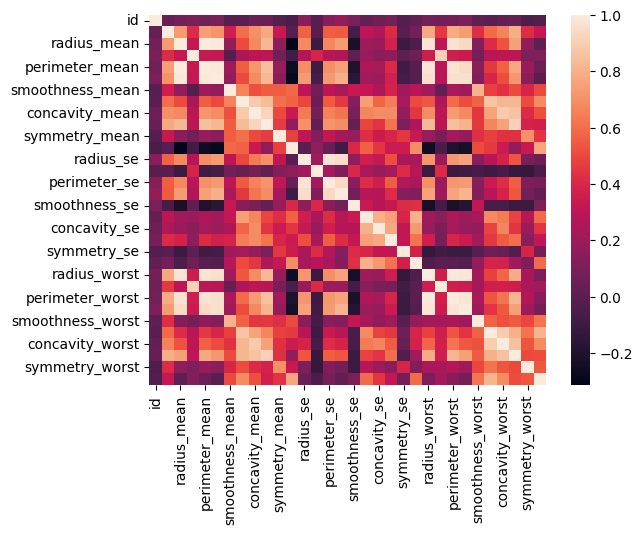

In [ ]:
#Verificando a correlação dos dados:
corr = df.drop('diagnosis', axis=1).corr()
sns.heatmap(corr)

# 4 Escolhendo as variáveis features e target

In [ ]:
#Separando as variáveis features e target
colunas = ['diagnosis','Diagnostico']
x = df.drop(colunas, axis=1)
y = df['Diagnostico']
y.value_counts()

,count
Diagnostico,
0,357
1,212


Feature select

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter =2000)

from sklearn.feature_selection import RFE
rfe = RFE(estimator=model, n_features_to_select=12)
fit = rfe.fit(x,y)


print("Características selecionadas:", fit.support_)
print("Ranking das características:", fit.ranking_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Características selecionadas: [False  True False False False False  True  True  True False False False
  True  True False False False False False False False  True False False
 False  True  True  True  True  True False]
Ranking das características: [20  1  5 11 18  4  1  1  1  2 14  9  1  1  7 16 10 15 13 12 17  1  3  6
 19  1  1  1  1  1  8]


# 5 Divisão dos dados

In [ ]:
colunas_selecionadas = [
    'compactness_mean',
    'concavity_mean',
    'concave points_mean',
    'texture_se',
    'perimeter_se',
    'radius_worst',
    'compactness_worst',
    'concavity_worst',
    'concave points_worst',
    'symmetry_worst',
    'fractal_dimension_worst'
]

x=x[colunas_selecionadas]
x.head()

,compactness_mean,concavity_mean,concave points_mean,texture_se,perimeter_se,radius_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.1058,0.08005,0.03821,1.0440,2.497,14.97,0.2378,0.2671,0.10150,0.3014,0.08750
1,0.1029,0.10800,0.07951,0.7975,5.486,24.86,0.2336,0.2687,0.17890,0.2551,0.06589
2,0.1223,0.14660,0.08087,0.7859,3.094,19.26,0.2394,0.3791,0.15140,0.2837,0.08019
3,0.1316,0.07741,0.02799,1.4600,2.204,12.88,0.2629,0.2403,0.07370,0.2556,0.09359
4,0.1120,0.06737,0.02594,1.7680,1.628,12.26,0.2118,0.1797,0.06918,0.2329,0.08134


Normalizar os dados : from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(x)
X_normalized_df = pd.DataFrame(X_normalized, columns=x.columns)

print("Dados escalados (MinMaxScaler):")
print(X_normalized_df)

Dados escalados (MinMaxScaler):
     compactness_mean  concavity_mean  concave points_mean  texture_se  \
0            0.265076        0.187559             0.189911    0.151123   
1            0.256181        0.253046             0.395179    0.096645   
2            0.315686        0.343486             0.401938    0.094082   
3            0.344212        0.181373             0.139115    0.243060   
4            0.284093        0.157849             0.128926    0.311130   
..                ...             ...                  ...         ...   
564          0.410159        0.201640             0.142744    0.108734   
565          0.252500        0.165651             0.173211    0.286598   
566          0.022606        0.016987             0.031064    0.079473   
567          0.288080        0.263824             0.321223    0.131078   
568          0.064413        0.055834             0.087972    0.267592   

     perimeter_se  radius_worst  compactness_worst  concavity_worst  \
0       

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_test, y_treino, y_test = train_test_split(x, y, test_size=0.25, random_state = 14 )



# Escolha e aplicação do modelo e treinamento do modelo

A) REGRESSÃO LOGÍSTICA:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rl = LogisticRegression(max_iter=1000)
rl.fit(x_treino, y_treino)
y_pred1 = rl.predict(x_test)


B) KNN(K-Neorest Neighbors)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_treino, y_treino)
y_pred2 = knn.predict(x_test)

C) Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
arvore = DecisionTreeClassifier(max_depth=4, random_state=42)
arvore.fit(x_treino, y_treino)
y_pred3 = arvore.predict(x_test)

D) SVM (Suport Vetorial Maquina)

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', gamma='scale', C=1)
svm.fit(x_treino, y_treino)
y_pred4 = svm.predict(x_test)

E) Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(x_treino, y_treino)
y_pred5 = rf.predict(x_test)

In [ ]:
x_test
df_test = x_test
df_test['y_real'] = y_test
df_test
df_test['Predição'] = y_pred1
df_test.head(20)

,compactness_mean,concavity_mean,concave points_mean,texture_se,perimeter_se,radius_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,y_real,Predição
352,0.08836,0.03296,0.02390,0.9050,0.9975,13.86,0.19580,0.18100,0.08388,0.3297,0.07834,0,0
20,0.12800,0.07789,0.05069,0.6205,1.9570,16.57,0.35420,0.27790,0.13830,0.2589,0.10300,1,0
484,0.07688,0.04479,0.03711,0.9195,1.8300,14.98,0.17240,0.14560,0.09993,0.2955,0.06912,0,0
1,0.10290,0.10800,0.07951,0.7975,5.4860,24.86,0.23360,0.26870,0.17890,0.2551,0.06589,1,1
472,0.05306,0.01765,0.02733,1.0810,1.5580,15.53,0.11090,0.05307,0.05890,0.2100,0.07083,0,0
380,0.06685,0.03512,0.02623,0.4607,1.1030,12.82,0.23900,0.21020,0.08958,0.3016,0.08523,0,0
480,0.06141,0.03809,0.03239,0.7655,1.7420,13.01,0.10400,0.15210,0.10990,0.2572,0.07097,0,0
166,0.05234,0.03653,0.02864,0.8732,1.4710,13.46,0.07061,0.10390,0.05882,0.2383,0.06410,0,0
220,0.13650,0.12930,0.08123,1.1500,2.7350,17.87,0.42900,0.35870,0.18340,0.3698,0.10940,1,1
296,0.07326,0.02511,0.01775,2.0150,1.7780,11.16,0.14020,0.10550,0.06499,0.2894,0.07664,0,0


# 6 Avaliação do modelo

A) Regressão logistica

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

cm = confusion_matrix(y_test, y_pred1)
print(' Matriz de Confunsão \n',cm)

 Matriz de Confunsão 
 [[82  3]
 [13 45]]


In [ ]:
accuracy = accuracy_score(y_test, y_pred1)
print("Acurácia:", accuracy)


precision = precision_score(y_test, y_pred1)
print("Precisão:", precision)


recall = recall_score(y_test, y_pred1)
print("Revocação:", recall)


f1 = f1_score(y_test, y_pred1)
print("F1-Score:", f1)

Acurácia: 0.8881118881118881
Precisão: 0.9375
Revocação: 0.7758620689655172
F1-Score: 0.8490566037735849


B) Knn

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

cm = confusion_matrix(y_test, y_pred2)
print(' Matriz de Confunsão \n',cm)

 Matriz de Confunsão 
 [[81  4]
 [12 46]]


In [ ]:
accuracy = accuracy_score(y_test, y_pred2)
print("Acurácia:", accuracy)


precision = precision_score(y_test, y_pred2)
print("Precisão:", precision)


recall = recall_score(y_test, y_pred2)
print("Revocação:", recall)


f1 = f1_score(y_test, y_pred2)
print("F1-Score:", f1)

Acurácia: 0.8881118881118881
Precisão: 0.92
Revocação: 0.7931034482758621
F1-Score: 0.8518518518518519


C) Decision Tree

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

cm = confusion_matrix(y_test, y_pred3)
print(' Matriz de Confunsão \n',cm)

 Matriz de Confunsão 
 [[81  4]
 [ 6 52]]


In [ ]:
accuracy = accuracy_score(y_test, y_pred3)
print("Acurácia:", accuracy)


precision = precision_score(y_test, y_pred3)
print("Precisão:", precision)


recall = recall_score(y_test, y_pred3)
print("Revocação:", recall)


f1 = f1_score(y_test, y_pred3)
print("F1-Score:", f1)

Acurácia: 0.9300699300699301
Precisão: 0.9285714285714286
Revocação: 0.896551724137931
F1-Score: 0.9122807017543859


D) SVM

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

cm = confusion_matrix(y_test, y_pred4)
print(' Matriz de Confunsão \n',cm)

 Matriz de Confunsão 
 [[83  2]
 [14 44]]


In [ ]:
accuracy = accuracy_score(y_test, y_pred4)
print("Acurácia:", accuracy)


precision = precision_score(y_test, y_pred4)
print("Precisão:", precision)


recall = recall_score(y_test, y_pred4)
print("Revocação:", recall)


f1 = f1_score(y_test, y_pred4)
print("F1-Score:", f1)

Acurácia: 0.8881118881118881
Precisão: 0.9565217391304348
Revocação: 0.7586206896551724
F1-Score: 0.8461538461538461


E) Random Forest

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

cm = confusion_matrix(y_test, y_pred5)
print(' Matriz de Confunsão \n',cm)

 Matriz de Confunsão 
 [[82  3]
 [ 9 49]]


In [ ]:
accuracy = accuracy_score(y_test, y_pred5)
print("Acurácia:", accuracy)


precision = precision_score(y_test, y_pred5)
print("Precisão:", precision)


recall = recall_score(y_test, y_pred5)
print("Revocação:", recall)


f1 = f1_score(y_test, y_pred5)
print("F1-Score:", f1)

Acurácia: 0.916083916083916
Precisão: 0.9423076923076923
Revocação: 0.8448275862068966
F1-Score: 0.8909090909090909
